# Titanic EDA

In [9]:
import pandas as pd 
x = pd.read_csv('train.csv')
y = pd.read_csv('test.csv')

x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
x.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,6.240917


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
x['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
!pip install seaborn



You should consider upgrading via the 'c:\users\uyyu2\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


# Visual Analysis

<Axes: xlabel='Survived', ylabel='count'>

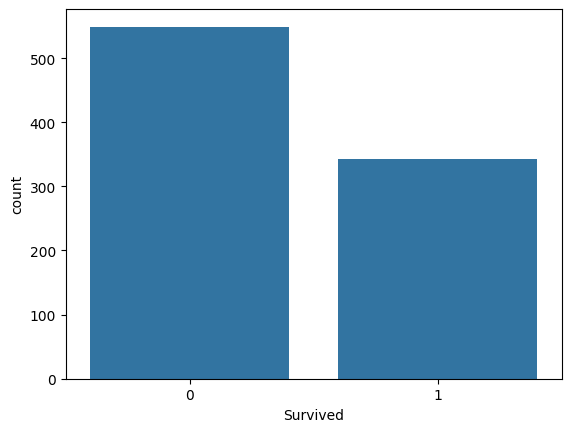

In [19]:
import seaborn as sns

sns.countplot(x='Survived', data=x)

<Axes: xlabel='Age', ylabel='Count'>

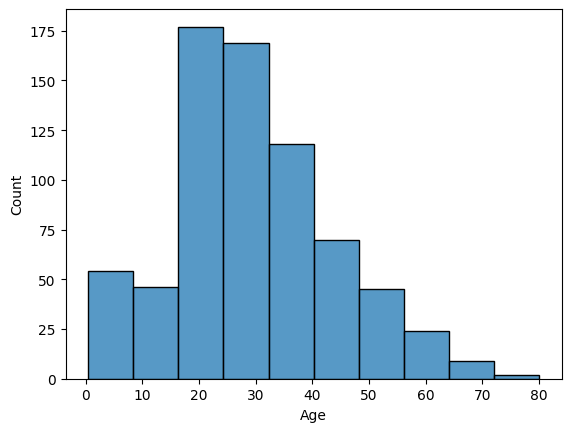

In [22]:
sns.histplot(data = x , x = 'Age', bins = 10)

<Axes: xlabel='Survived', ylabel='Age'>

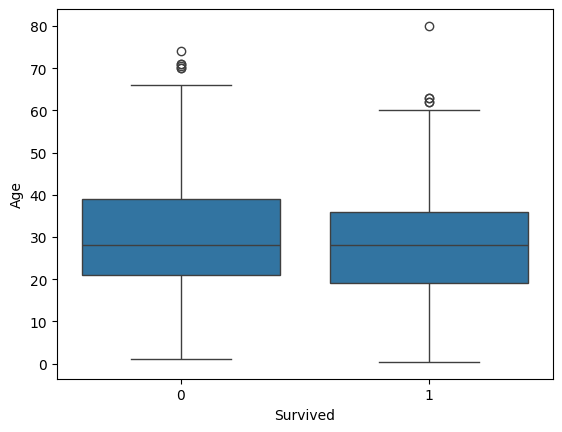

In [23]:
#bivariate analysis 

sns.boxplot(data=x , x = "Survived" , y = 'Age')

(0.0, 1.0)

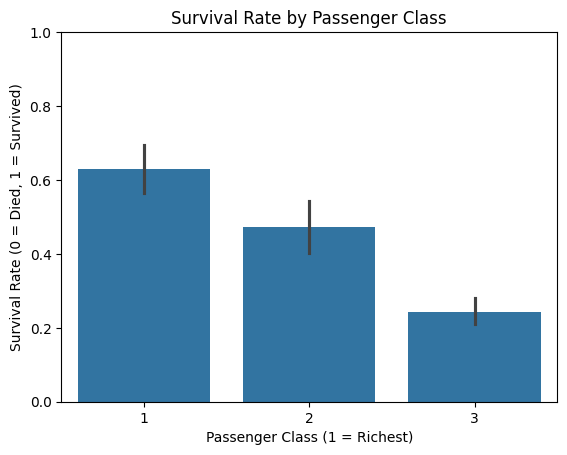

In [30]:
import matplotlib.pyplot as plt 
sns.barplot(data=x, x='Pclass', y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate (0 = Died, 1 = Survived)")
plt.xlabel("Passenger Class (1 = Richest)")
plt.ylim(0, 1)

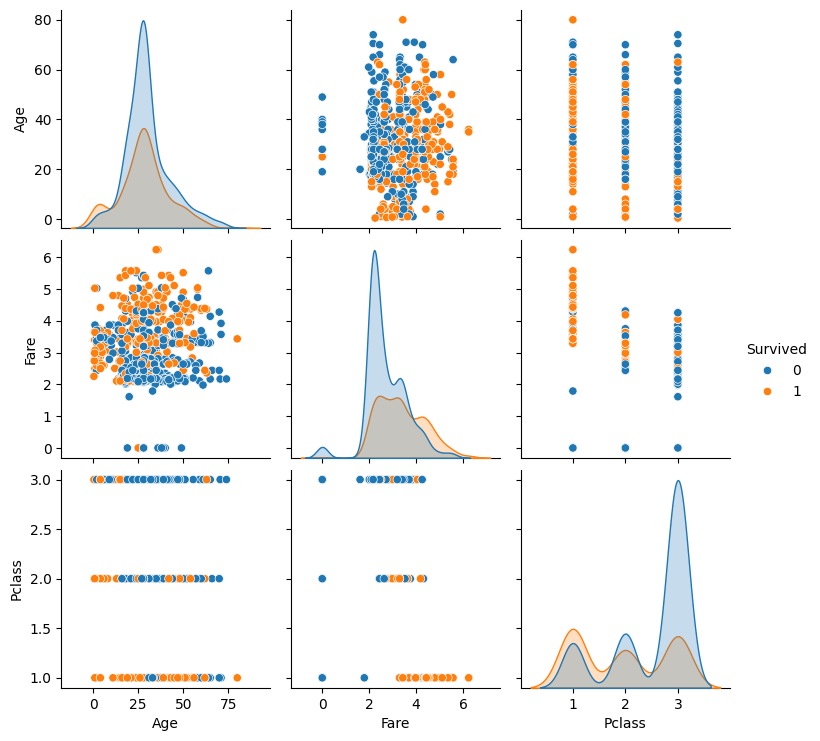

In [47]:
# Multi variate analysis 
sns.pairplot(x[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')

<Axes: >

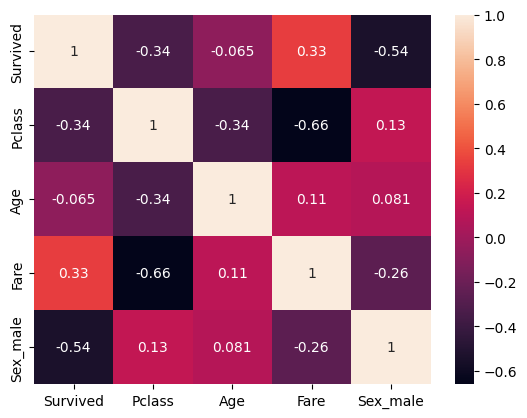

In [46]:
xencoded = pd.get_dummies(x , columns=['Sex'])
newx = xencoded[['Survived','Pclass','Age','Fare','Sex_male']]
sns.heatmap(newx.corr(),annot=True)

# Data cleaning and preprocessing

In [37]:
#missing values 
import numpy as np
x['Age'].fillna(x['Age'].median(), inplace= True)
x['Fare'] = np.log1p(x['Fare'])
